In [1]:
from analysis.data_gen_utils import download_IBL, extract_IBL, make_dataset, combine_datasets
import numpy as np
import matplotlib.pyplot as plt

2023-10-11 18:44:41.525516: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-11 18:44:41.525547: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-11 18:44:41.525567: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-11 18:44:41.532709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 18:44:42.375206: W tensorflow/compiler/

### Download and destripe AP data from an IBL session by its PID.

In [2]:
pid_sess1 = 'dab512bd-a02d-4c1f-8dbc-9155a163efc0'
pid_sess2 = 'febb430e-2d50-4f83-87a0-b5ffbb9a4943'
save_folder_sess1 = '/media/cat/data/IBL_data_CEED/dab512bd-a02d-4c1f-8dbc-9155a163efc0'
save_folder_sess2 = '/media/cat/data/IBL_data_CEED/febb430e-2d50-4f83-87a0-b5ffbb9a4943'
t_window = [0, 500] #in seconds
bin_file_sess1, meta_file_sess1 = download_IBL(pid=pid_sess1, t_window=t_window, save_folder=save_folder_sess1, overwrite=False)
bin_file_sess2, meta_file_sess2 = download_IBL(pid=pid_sess2, t_window=t_window, save_folder=save_folder_sess2, overwrite=False)

/home/cole/Downloads/ONE/alyx.internationalbrainlab.org/danlab/Subjects/DY_016/2020-09-12/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.meta
/media/cat/data/IBL_data_CEED/dab512bd-a02d-4c1f-8dbc-9155a163efc0 already exists and overwrite=False. skipping destriping.
2023-10-11 18:44:52.253 WARNING  [spikeglx.py:104] /home/cole/Downloads/ONE/alyx.internationalbrainlab.org/cache/ap/danlab/Subjects/DY_016/2020-09-12/001/raw_ephys_data/probe00/chunk_000000_to_000499/_spikeglx_ephysData_g0_t0.imec0.ap.stream.cbin : meta data and compressed chunks dont checkout
File duration: expected 3668.9780333333333, actual 500.0
Will attempt to fudge the meta-data information.
File duration: expected 3668.9780333333333, actual 500.0
Will attempt to fudge the meta-data information.
/home/cole/Downloads/ONE/alyx.internationalbrainlab.org/danlab/Subjects/DY_009/2020-02-27/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.meta
/media/cat/data/IBL_data_CEED/febb430e-2d50-4f83-87a0-b

In [3]:
'''extract the all data needed to make CEED dataset
spike_idx_sess: spike_times, channels, neurons (if use_labels=True)
geom_sess: channels x 2
chan_idx_sess: waveform extraction channels for each channel
templates_sess: templates across all channels for all neurons
'''
recompute = False

if recompute:
    spike_idx_sess1, geom_sess1, chan_idx_sess1, templates_sess1 = extract_IBL(bin_fp=bin_file_sess1, meta_fp=meta_file_sess1, pid=pid_sess1, t_window=t_window, use_labels=True)
    spike_idx_sess2, geom_sess2, chan_idx_sess2, templates_sess2 = extract_IBL(bin_fp=bin_file_sess2, meta_fp=meta_file_sess2, pid=pid_sess2, t_window=t_window, use_labels=True)
else:
    spike_idx_sess1 = np.load('spike_idx_sess1.npy')
    geom_sess1 = np.load('geom_sess1.npy')
    chan_idx_sess1 = np.load('chan_idx_sess1.npy')
    templates_sess1 = np.load('templates_sess1.npy')
    spike_idx_sess2 = np.load('spike_idx_sess2.npy')
    geom_sess2 = np.load('geom_sess2.npy')
    chan_idx_sess2 = np.load('chan_idx_sess2.npy')
    templates_sess2 = np.load('templates_sess2.npy')

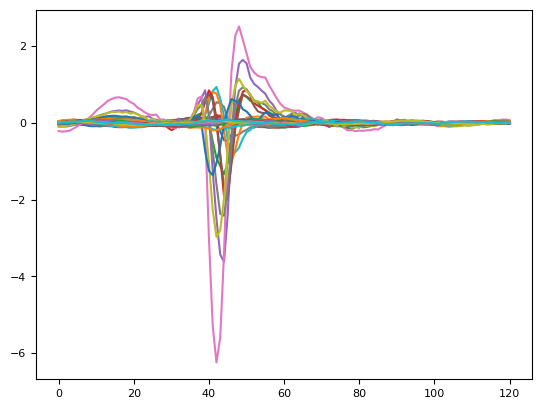

In [4]:
#plot a template on the 40 extracted channels (not all 40 used to train CEED).
template_id = 17
plt.plot(templates_sess1[template_id][:,chan_idx_sess1[template_id]]);

In [5]:
save_fewer = True

In [6]:
# session 1 units to get data from and dataset save path
selected_units_sess1 = [200, 210, 220]#np.arange(200)
dataset_folder_sess1 = save_folder_sess1 + '/ds'

# make a dataset for training
# will create a folder with the spike, probe channel number, and corresponding channel location datasets in the train, val, test splits
# optionally also saves out spatial and temporal noise covariance matrices
train_set1, val_set1, test_set1, train_geom_locs1, val_geom_locs1, \
test_geom_locs1, train_max_chan1, val_max_chan1, test_max_chan1 = make_dataset(bin_path=bin_file_sess1, spike_index=spike_idx_sess1,
                                                                               geom=geom_sess1, save_path=dataset_folder_sess1, 
                                                                               chan_index=chan_idx_sess1, templates=templates_sess1, 
                                                                               unit_ids=selected_units_sess1, train_num=200, val_num=0, 
                                                                               test_num=200, save_covs=True,num_chans_extract=21, 
                                                                               plot=False, normalize=False, shift=False, inference=False,
                                                                               save_fewer=save_fewer)

saving no split train dataset


In [7]:
# session 1 units to get data from and dataset save path
selected_units_sess2 = [200, 210, 220]#np.arange(200)
dataset_folder_sess2 = save_folder_sess2 + '/ds'

# make a dataset for training
# will create a folder with the spike, probe channel number, and corresponding channel location datasets in the train, val, test splits
# optionally also saves out spatial and temporal noise covariance matrices
train_set2, val_set2, test_set2, train_geom_locs2, val_geom_locs2, \
test_geom_locs2, train_max_chan2, val_max_chan2, test_max_chan2 = make_dataset(bin_path=bin_file_sess2, spike_index=spike_idx_sess2,
                                                                               geom=geom_sess2, save_path=dataset_folder_sess2, 
                                                                               chan_index=chan_idx_sess2, templates=templates_sess2, 
                                                                               unit_ids=selected_units_sess2, train_num=200, val_num=0, 
                                                                               test_num=200, save_covs=True,num_chans_extract=21, 
                                                                               plot=False, normalize=False, shift=False, inference=False,
                                                                               save_fewer=save_fewer)

saving no split train dataset


In [8]:
combined_ds_path = '/media/cat/data/IBL_data_CEED/combined'

# combine the two training datasets into a larger one for more unit diversity
combine_datasets(dataset_folder_sess1, dataset_folder_sess2, combined_ds_path)

In [9]:
inference_ds_path = save_folder_sess1 + '/inference'
selected_units_inf = [200, 210, 220]

# make a dataset for spike sorting inference
# will save out only spikes, channel numbers, and channel locations for a spikes test set (only pass in test_num)
# save_var_num flag will allow units with < test_num spikes in the recording to be saved out in the test set as well (change to min and max spikes)
# for cell type datasets the normalize Flag can be set to True
test_set, test_geom_locs, test_max_chan = make_dataset(bin_path=bin_file_sess1, spike_index=spike_idx_sess1, 
                                                       geom=geom_sess1, save_path=inference_ds_path, 
                                                       chan_index=chan_idx_sess1, templates=templates_sess1, 
                                                       unit_ids=selected_units_inf, test_num=200, save_covs=True,
                                                       num_chans_extract=21, normalize=False, save_fewer=save_fewer, inference=True)

In [10]:
spikes_test = np.load(save_folder_sess1 + '/ds/spikes_test.npy') 
labels_test = np.load(save_folder_sess1 + '/ds/labels_test.npy') 
channel_num_test = np.load(save_folder_sess1 + '/ds/channel_num_test.npy') 
channel_spike_locs_test = np.load(save_folder_sess1 + '/ds/channel_spike_locs_test.npy') 